In [162]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [163]:
from collections import Counter
from sklearn.cluster import HDBSCAN
import pandas as pd
from src.utils_clustering import *
import time

In [164]:
N_CLASSES = 15

In [165]:
DATASET_FILE_NAME = "s1"
file_path = rf'..\data\processed\{DATASET_FILE_NAME}.txt'
processed_data = pd.read_csv(file_path)

In [166]:
# Start measuring time
start_time = time.time()

hdbscan_clustering = HDBSCAN(min_cluster_size=N_CLASSES, min_samples=13)
labels_pred = hdbscan_clustering.fit_predict(processed_data)

# Measure elapsed time
end_time = time.time()
running_time = end_time - start_time

In [167]:
cluster_distribution = Counter(labels_pred)
print("Predicted Distribution: ",cluster_distribution)

Predicted Distribution:  Counter({9: 343, 8: 342, 0: 329, 10: 328, 5: 325, 4: 325, 1: 324, 3: 322, 13: 318, 12: 313, 6: 312, 7: 310, 2: 308, 14: 306, 11: 273, -1: 222})


In [168]:
LABELS_FILE_NAME = 's1-label'
labels_true = load_labels_from_file(rf'..\data\label\{LABELS_FILE_NAME}.pa', len(labels_pred))
cluster_distribution = Counter(labels_true)
print(cluster_distribution)

Counter({13: 350, 14: 350, 15: 350, 12: 349, 11: 347, 10: 342, 9: 341, 8: 338, 7: 334, 6: 326, 5: 325, 4: 318, 2: 316, 3: 314, 1: 300})


In [169]:
clustering_algorithm_name = 'HDBSCAN_clustering'
dataset_name = DATASET_FILE_NAME
results_path = r'../results/metrics/results.csv'

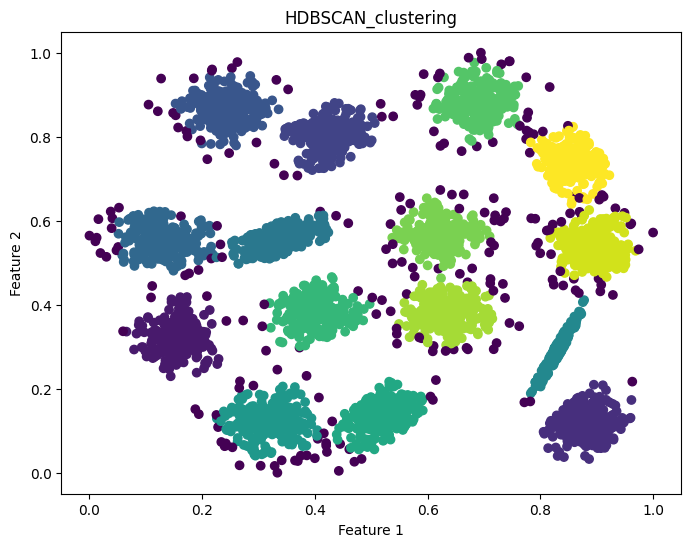

In [170]:
plot_clusters(processed_data, labels_pred, title=clustering_algorithm_name)

In [171]:
labels_pred = map_clusters_to_ground_truth_dbscan(labels_true, labels_pred)

Confusion Matrix:


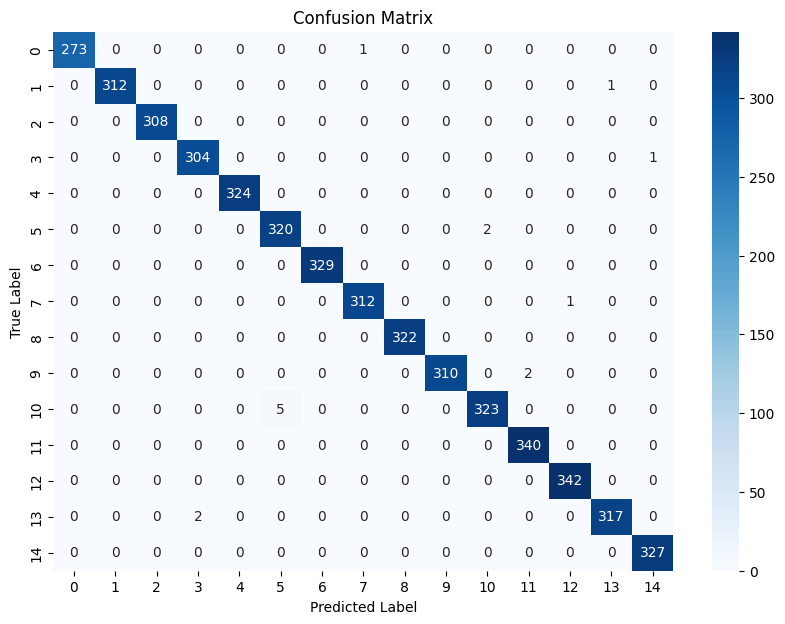

Each cluster's accuracy indicates how well the clustering algorithm has grouped the data points,
compared to the ground truth labels. Higher accuracy means a closer match to the expected grouping.

Cluster 1 Accuracy: 99.64%
Cluster 2 Accuracy: 99.68%
Cluster 3 Accuracy: 100.00%
Cluster 4 Accuracy: 99.67%
Cluster 5 Accuracy: 100.00%
Cluster 6 Accuracy: 99.38%
Cluster 7 Accuracy: 100.00%
Cluster 8 Accuracy: 99.68%
Cluster 9 Accuracy: 100.00%
Cluster 10 Accuracy: 99.36%
Cluster 11 Accuracy: 98.48%
Cluster 12 Accuracy: 100.00%
Cluster 13 Accuracy: 100.00%
Cluster 14 Accuracy: 99.37%
Cluster 15 Accuracy: 100.00%

Overall Accuracy: 95.26%
This represents the proportion of all data points that were correctly grouped by the clustering algorithm.


In [172]:
generate_confusion_matrix(labels_true, labels_pred, N_CLASSES)

In [173]:
algorithm_params = hdbscan_clustering.get_params()
algorithm_details = str(algorithm_params)

In [174]:
# Evaluate and save results
evaluate_clustering(X=processed_data, labels_true=labels_true, labels_pred=labels_pred,
                    clus_algo_name=clustering_algorithm_name, dataset_name=dataset_name, 
                    results_path=results_path, algorithm_details=algorithm_details, 
                    running_time=running_time)

Timestamp: 2024-02-07 04:39:17.283551
Dataset: s1
Clustering Algorithm: HDBSCAN_clustering
Algorithm Details: {'algorithm': 'auto', 'allow_single_cluster': False, 'alpha': 1.0, 'cluster_selection_epsilon': 0.0, 'cluster_selection_method': 'eom', 'copy': False, 'leaf_size': 40, 'max_cluster_size': None, 'metric': 'euclidean', 'metric_params': None, 'min_cluster_size': 15, 'min_samples': 13, 'n_jobs': None, 'store_centers': None}
Running Time (seconds): 0.11255717277526855
Accuracy: 0.9526
